# Logistic Regression
## Classification

The main difference between linear and logistic regression is that the values $y$ which we predict are on a discrete space. 
Some simple examples where $y\in\{0,1\}$ for classification are:
- Email: 0=Not Spam/1=Spam 
- Transactions: Fraudulent (1=Yes/0=No)?
- Tumor 0=Benign/1=Malignant?

We will start by looking into a **binary classification** classification problem where y can only take on two values (0 and 1). Later we will look into **multi-class classification** where $y$ can take an arbitrary amount of discrete values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [2]:
y = [0, 0, 0, 0, 1, 1, 1, 1]
x = [0.1, 0.3, 0.6, 0.8, 1.2, 1.3, 1.6, 1.7]
fig=plt.figure(figsize=(5,3))
ax=fig.add_axes([0,0,1,1])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Malignant')
ax.set_xlim([0,2])
ax.set_ylim([-0.1,1.1])
ax.annotate('(Yes) 1',xy=(0,0),xytext=(-0.15,0.99),annotation_clip=False)
ax.annotate('(No) 0',xy=(0,0),xytext=(-0.15,-0.01),annotation_clip=False)
ax.scatter(x, y, s=200, marker='x', color='r', linewidth=4)
plt.show()

If we use linear regression as we learned before, we would fit a line $h_{\theta}(x) = \theta^Tx$ through our plot. The following code block computes the optimal values for $\theta$ using the normal equation. 
\begin{align}
\theta = (X^TX)^{-1}X^Ty
\end{align}

We can add a threshold and make classifications based on the predicted value.
\begin{align}
\text{If } h_\theta(x) \geq 0.5,\text{ predict } y=1\\
\text{If } h_\theta(x) < 0.5,\text{ predict } y=0
\end{align}

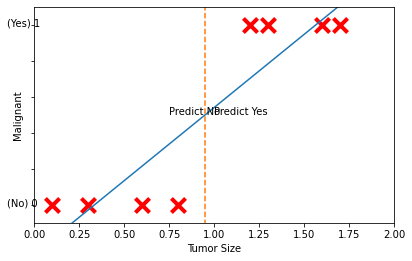

In [3]:
X = np.array([np.ones(len(x)),x]).T
theta = inv(X.T.dot(X)).dot((X.T.dot(y)))
norm_x = [0,2]
norm_y = theta.dot([np.ones(2),norm_x])
ax.plot(norm_x, norm_y)
ax.plot([0.95,0.95], [-0.2,1.2],linestyle='dashed')
ax.annotate('Predict No',xy=(0,0),xytext=(0.75,0.5),annotation_clip=False)
ax.annotate('Predict Yes',xy=(0,0),xytext=(1,0.5),annotation_clip=False)
fig

In the given example, linear regression would preform reasonably well on this classification task. However, if we add more outlier values to our example, we will quickly see that this method will not perform quite as well anymore.
Let's add a positive value for $x=5$ to our training set:

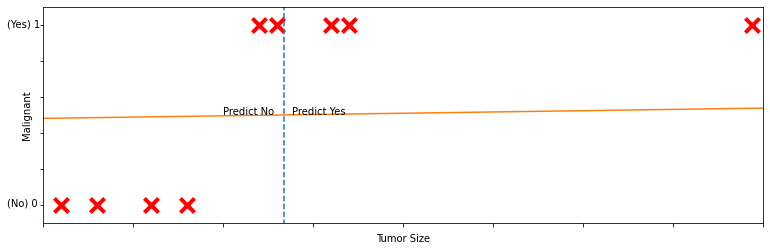

In [16]:
y_outlier = y + [1]
x_outlier = np.append(np.array(x)/2,20)
X = np.array([np.ones(len(x_outlier)),x_outlier]).T
theta = inv(X.T.dot(X)).dot((X.T.dot(y_outlier)))
norm_x = [0,5]
norm_y = theta.dot([np.ones(2),norm_x])
fig=plt.figure(figsize=(10,3))
ax=fig.add_axes([0,0,1,1])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlim([0,2])
ax.set_ylim([-0.1,1.1])
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Malignant')
ax.annotate('(Yes) 1',xy=(0,0),xytext=(-0.1,0.99),annotation_clip=False)
ax.annotate('(No) 0',xy=(0,0),xytext=(-0.1,-0.01),annotation_clip=False)
#For visualization puropses I will move the outlier closer than it is
x_outlier[-1] = 1.97
ax.scatter(x_outlier, y_outlier, s=200, marker='x', color='r', linewidth=4)
ax.plot([0.67,0.67], [-0.2,1.2],linestyle='dashed')
ax.annotate('Predict No',xy=(0,0),xytext=(0.5,0.5),annotation_clip=False)
ax.annotate('Predict Yes',xy=(0,0),xytext=(0.69,0.5),annotation_clip=False)
ax.plot(norm_x, norm_y)
plt.show()

We can observe that with such an outlier, our regression line will shift and we with the new datapoint, we might create wrong predictions. For the algorithm, it should be no surprise that the outlier is a positive point. However, it should also not have such a big effect on the other training samples.

This should show that linear regression is not very suitable for classification problems. Mainly because classification is not actually a linear function.

Another observation that we can make is that our algorithm can output values which exceed the limit of $0<y<1$ (see first example). The algorithm should not be able to predict such predictions.

For the **logistic regression** classification algorithm, we have:
\begin{align}
0 \leq h_\theta(x) \leq 1
\end{align}

### Hypothesis function

How can we come up with a hypothesis function that satisfies $0 \leq h_\theta(x) \leq 1$?

We will obtain this by wrapping our predictions with the **Sigmoid function** (alternatively Logistic function): $h_\theta(x) = 
g(\theta^Tx)$

The Sigmoid function essentially maps any value $z \in \mathbb{R}$ in the range (0,1)
\begin{align}
g(z) = \frac{1}{1+e^{-\theta^Tx}}
\end{align}
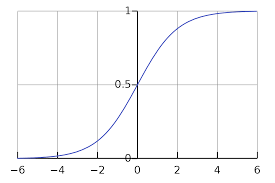

We treat the output $h_\theta(x)$ as the estimated probability that y=1 on input x
Looking at the tumor example from above. Say that for a given tumor size, the hypothesis is $h_\theta(x)=0.7$. In words that means that there is a 70% chance that the tumor is being malignant.

In terms of probabilities, we write $h_\theta(x) = p(y=1|x;\theta)$ = "probability that y=1, given x, parameterized by $\theta$". We can compute the probabilities for y=1 and y=0 

$P(y=0|x;\theta)+P(y=1|x;\theta)=1$
$P(y=0|x;\theta) P(y=1|x;\theta)=1$
